# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
data = pd.read_csv('abcnews.csv')
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


# Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244184 entries, 0 to 1244183
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1244184 non-null  int64 
 1   headline_text  1244184 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.0+ MB


In [4]:
data[data['headline_text'].str.isspace()] 

,publish_date,headline_text


In [5]:
def convert_dt(val):
    return pd.Timestamp(str(val))

data['publish_date'] = data['publish_date'].apply(convert_dt)

In [6]:
import re

In [7]:
data['headline_text'] = data['headline_text'].apply(lambda text : re.sub('\d+', '', text))

In [8]:
data.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


# Vectorization

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cvf = CountVectorizer(max_df = 0.9, min_df = 2, stop_words = 'english')

text_vect = cvf.fit_transform(data['headline_text'])

### List of tokens

In [10]:
words = cvf.get_feature_names_out()

# Latent Dirichlet Allocation

In [11]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components = 7, n_jobs = -1, verbose = 1, random_state = 0)
lda.fit(text_vect)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(n_components=7, n_jobs=-1, random_state=0, verbose=1)

### Topic-Word matrix

In [12]:
lda.components_

array([[ 0.14358752,  0.1438581 ,  0.14334777, ...,  3.14191576,
         0.1429054 ,  0.14285726],
       [ 0.1431016 ,  0.14306087,  0.14285746, ...,  0.14304472,
         0.14298019,  0.14285729],
       [ 0.14305441,  0.14287285,  0.1429264 , ...,  0.14301086,
        18.14208976,  3.14237329],
       ...,
       [17.85057368, 52.11685783,  4.14198216, ...,  0.14295128,
         0.14300427,  0.14285725],
       [ 0.14314801,  0.14287183,  0.14285748, ...,  0.14285748,
         0.14313824,  0.1428573 ],
       [ 0.14287815,  0.1675093 ,  0.14285739, ...,  0.14294404,
         0.14300361,  0.14291397]])

## Topic `#1`

In [13]:
topic1 = lda.components_[0]
top_20_words_index = topic1.argsort()[-20:]
top_20_words = words[top_20_words_index]

print(top_20_words)

['prices' 'tax' 'price' 'land' 'mining' 'nsw' 'says' 'fears' 'mp' 'port'
 'wa' 'plans' 'labor' 'plan' 'country' 'rise' 'new' 'centre' 'election'
 'council']


#### Seems like, Topic #1 is about `Economy`

## Top 20 words from all 7 topics

In [14]:
topics = lda.components_

In [15]:
for i,topic in enumerate(topics):
    print(f"Topic {i+1} : ")
    print([words[i] for i in topic.argsort()[-20:]])
    print()

Topic 1 : 
['prices', 'tax', 'price', 'land', 'mining', 'nsw', 'says', 'fears', 'mp', 'port', 'wa', 'plans', 'labor', 'plan', 'country', 'rise', 'new', 'centre', 'election', 'council']

Topic 2 : 
['flood', 'cyclone', 'industry', 'cattle', 'weather', 'bushfire', 'queensland', 'live', 'victoria', 'coast', 'rain', 'australia', 'nsw', 'covid', 'minister', 'time', 'inquiry', 'new', 'says', 'coronavirus']

Topic 3 : 
['return', 'st', 'hobart', 'food', 'battle', 'thousands', 'bail', 'race', 'donald', 'oil', 'says', 'iraq', 'gas', 'people', 'court', 'wins', 'takes', 'trump', 'power', 'interview']

Topic 4 : 
['league', 'australian', 'pakistan', 'england', 'west', 'india', 'set', 'adelaide', 'afl', 'safety', 'new', 'test', 'final', 'open', 'cup', 'north', 'australia', 'world', 'win', 'day']

Topic 5 : 
['pay', 'calls', 'boost', 'government', 'report', 'sa', 'urged', 'support', 'business', 'workers', 'budget', 'plan', 'abc', 'says', 'funding', 'new', 'rural', 'health', 'water', 'govt']

Topic 6

### Document-Topic matrix

In [16]:
doc_topic_matrix = lda.transform(text_vect)

### Assigning the topics to each documents, which have max probability

In [17]:
doc_topic = doc_topic_matrix.argmax(axis = 1)

### Assigning topic names based on the words it contain

In [18]:
mapping = {
    0 : 'Economic and Political Developments',
    1 : 'Natural Disasters and Environmental Issues',
    2 : 'Current Events and News', 
    3 : 'Sports and Competitions',
    4 : 'Government Policies and Economic Initiatives',
    5 : 'Law Enforcement, Investigations, and Crime',
    6 : 'Criminal Investigations, Legal Proceedings, and Incidents.'
}

In [19]:
data['topic'] = doc_topic

In [20]:
data['topic'] = data['topic'].map(mapping)

In [21]:
data.sample(5)

,publish_date,headline_text,topic
29948,2003-07-13,fed opp pledges increase in university teaching,Government Policies and Economic Initiatives
1235843,2021-04-21,we still have work to do kamala harris reacts ...,Natural Disasters and Environmental Issues
793227,2013-06-07,mimosa bugs,Current Events and News
166105,2005-05-28,animal welfare groups to fight wallaby export ...,Economic and Political Developments
467121,2009-06-07,arrest made over sydney murder,"Criminal Investigations, Legal Proceedings, an..."


### Visualizing the frequency of the topics

In [23]:
topic_freq = data['topic'].value_counts()
topic_freq = topic_freq.reset_index()

In [25]:
topic_freq

,topic,count
0,Government Policies and Economic Initiatives,232219
1,"Criminal Investigations, Legal Proceedings, an...",202758
2,Economic and Political Developments,199618
3,Sports and Competitions,179428
4,Natural Disasters and Environmental Issues,151066
5,Current Events and News,143008
6,"Law Enforcement, Investigations, and Crime",136087


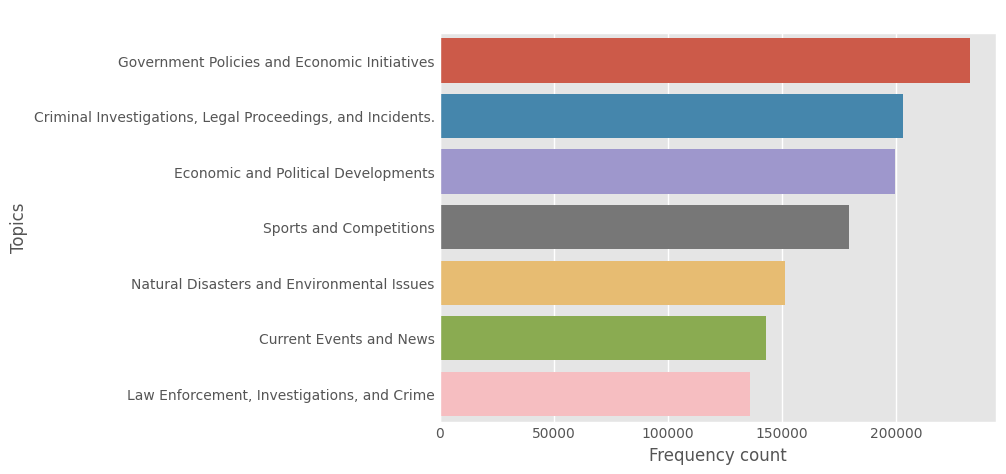

In [31]:
plt.style.use('ggplot')
sns.barplot(x = 'count', y = 'topic', data = topic_freq)
plt.title("Frequency distribution of the topics")
plt.ylabel("Topics")
plt.xlabel("Frequency count")
plt.show()